* **Part1: Exploratory Data Analysis(EDA):**
    * Analysis of the features.
    * Finding any felations or trends considering multiple features.
* **Part2: Feature Engineering and Data Cleaning:**
    * Adding any few features.
    * Removing redundant features.
    * Converting features into suitable form for modeling.
* **Part3: Predictive Modeling:**
    * Running Basic Algorithms.
    * Cross Validation.
    * Ensembling.
    * Important Features Extraction.

# Part1: Exploratory Data Analysis(EDA)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns # a style of show like matplotlib
plt.style.use('fivethirtyeight') # a style of matplotlib
import warnings
warnings.filterwarnings('ignore') # ignore warnings
%matplotlib inline

In [2]:
data = pd.read_csv('/Users/hugo/Projects/Kaggle/Titanic-Kaggle/data/train.csv')

In [3]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [5]:
data.isnull().sum() # checking for total null values

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

The **Age, Cabin and Embarked** have null values. I will try to fix them.

### How many Survived?

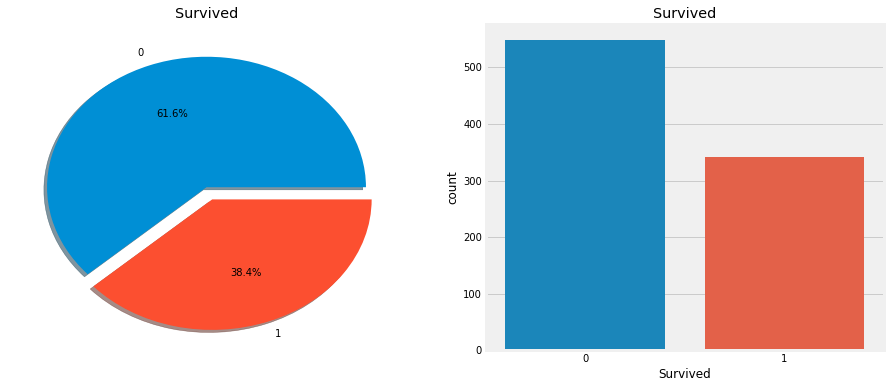

In [6]:
f, ax = plt.subplots(1, 2, figsize=(14, 6)) 
# layouts of subplots, figsize = width, height in inches. If not provided, defaults to rc figure.figsize.
# ax[0] for percent, ax[1] for counts
data['Survived'].value_counts().plot.pie(explode=[0, 0.1], autopct='%1.1f%%', ax=ax[0], shadow=True)
ax[0].set_title('Survived')
ax[0].set_ylabel('')
sns.countplot('Survived', data=data, ax=ax[1])
ax[1].set_title('Survived')
plt.show()

It is evident that not many passengers survived the accident.

Out of 891 passengers in training set, only around 350 survived i.e Only 38.4% of the total training set survived the crash.
We need to dig down more to get better insights from the data and see which categories of the passengers did survive and
who didn't.

We will try to check the survival rate by using the different features of the dataset. Some of the features being Sex, Port Of
Embarcation, Age, etc.

First let us understand the different types of features.

## Types Of Features
### Categorical Features:
A categorical variable is one that has two or more categories and each value in that feature can be categorised by them. For example, gender is a categorical variable having two categories(male and female). Now we cannot sort or give any ordering to such variables. They are also known as **Nominal Variables.**

**Categorical Features in the dataset: Sex, Embarked.**

### Ordinal Features:
An ordinal variable is similar to categorical values, but the difference between them is that we can have relative ordering or sorting between the values. For eg: If we have a feature like **Height** with values **Tall, Medium, Short,** then Height is a ordinal variable. Here we can have a relative sort in the variable.

**Ordinal Features in the dataset: Pclass**

### Continous Feature:
A feature is said to be continous if it can take values between any two points or between the minimum or maximum values in the features column.

**Coninous Features in the dataset:Age**

## Analysing The Features

### Sex --> Categorical Feature

In [7]:
data.groupby(['Sex', 'Survived'])['Survived'].count()

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

In [8]:
data[['Sex', 'Survived']].groupby(['Sex']).mean()

,Survived
Sex,
female,0.742038
male,0.188908


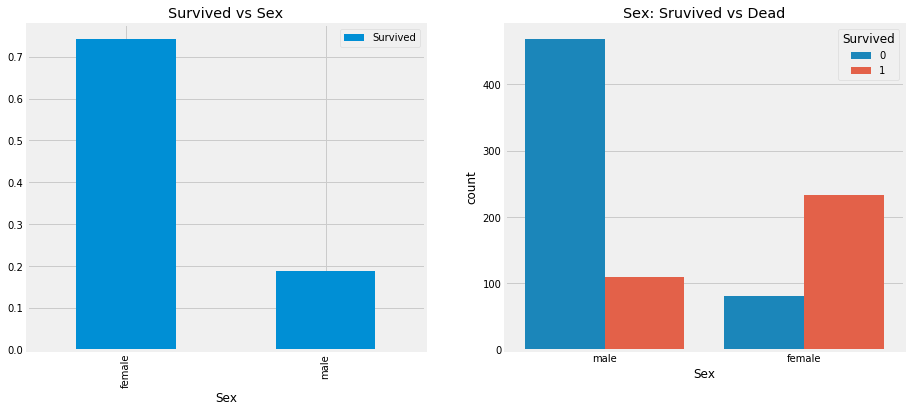

In [9]:
f, ax = plt.subplots(1, 2, figsize=(14, 6))
data[['Sex', 'Survived']].groupby(['Sex']).mean().plot.bar(ax=ax[0])
ax[0].set_title('Survived vs Sex')
sns.countplot('Sex', hue='Survived', data=data, ax=ax[1])
ax[1].set_title('Sex: Sruvived vs Dead')
plt.show()

This looks interesting. The number of men on the ship is lot more than the number of women. Still the number of women saved is almost twice the number of males saved. The survival rates for a **women on the ship is around 75% while that for men in around 18-19%.**

This looks to be a **very important** feature for modeling. But is it the best?? Lets check other features.

### Pclass --> Ordinal Feature

In [10]:
pd.crosstab(data.Pclass, data.Survived, margins=True).style.background_gradient(cmap='summer_r')

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


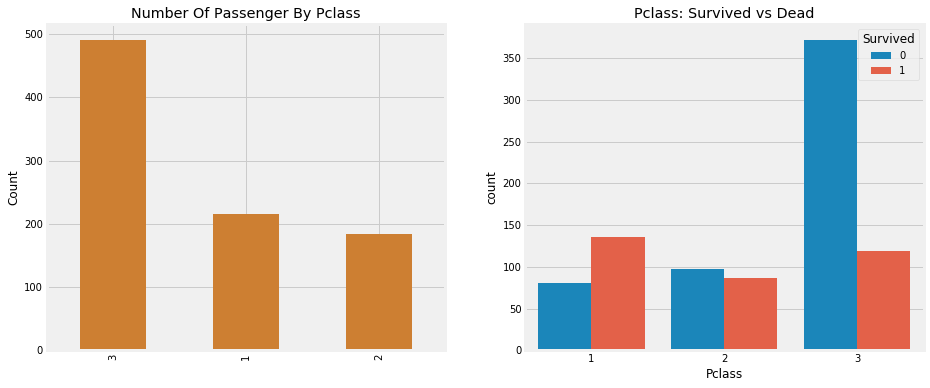

In [11]:
f,ax = plt.subplots(1, 2, figsize=(14, 6))
data['Pclass'].value_counts().plot.bar(color=['#CD7F32', '#FFDF00', '#D3D3D3'], ax=ax[0])
ax[0].set_title('Number Of Passenger By Pclass')
ax[0].set_ylabel('Count')
sns.countplot('Pclass', hue='Survived', data=data, ax=ax[1])
ax[1].set_title('Pclass: Survived vs Dead')
plt.show()

People say **Money Can't Buy Everything.** But we can clearly see that Passengers Of Pcalss 1 were given a very high priority while rescue. Even though the the number of Passengers in Pcalss 3 were a lot higher, still the number of survival from them is very low, somewhere around **25%**.

For Pclass1 survived is around **63%** while for Pclass2 is around **48%**. So money and status matters. Such a materialistic world.

Lets Dive in little bit more and check for other interesting observations. Lets check survival rate with **Sex and Pcalss** Together.

In [12]:
pd.crosstab([data.Sex, data.Survived], data.Pclass, margins=True).style.background_gradient(cmap='summer_r')

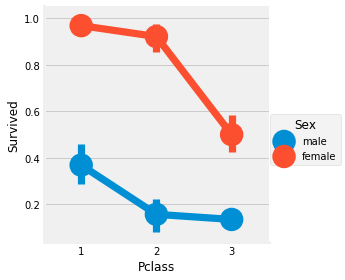

In [13]:
sns.factorplot('Pclass', 'Survived', hue='Sex', data=data)
plt.show()

We use **FactorPlot** in this case, because they make the seperation of categorical values easy.

looking at the **Cross Tab** and the **FactorPlot,** we can easily infer that survival for **Women from Pclass1** is about **95-96%**, as only 3 out of 94 Women from Pclass1 died.

It is evident that irrenspective of Pclass, Women were given first priority while rescue. Even Pclass1 have a very low survival rate.

Looks like Pclass is also an important feature. Lets analyse other features.

### Age --> Continous Feature

In [14]:
print('Oldest Passenger was of:', data['Age'].max(), 'Years')
print('Youngest Passenger was of:', data['Age'].min(), 'Years')
print('Average Passenger was of:', data['Age'].mean(), 'Years')

Oldest Passenger was of: 80.0 Years
Youngest Passenger was of: 0.42 Years
Average Passenger was of: 29.6991176471 Years


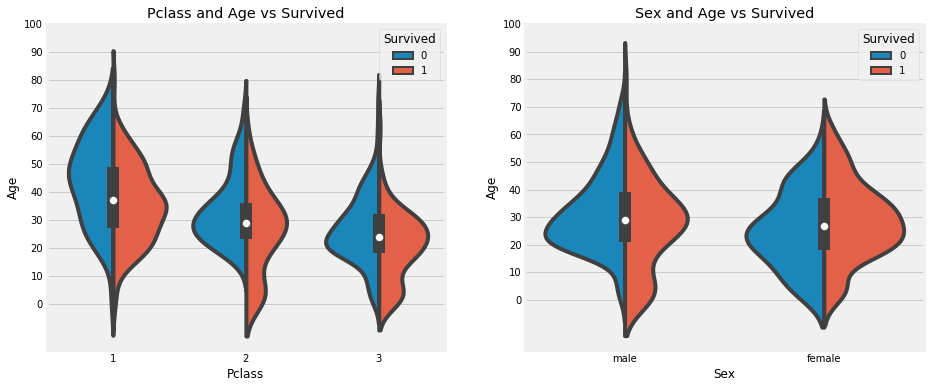

In [15]:
f, ax = plt.subplots(1, 2, figsize=(14, 6))
sns.violinplot('Pclass', 'Age', hue='Survived', data=data, split=True, ax=ax[0])
ax[0].set_title('Pclass and Age vs Survived')
ax[0].set_yticks(range(0, 110, 10))
sns.violinplot('Sex', 'Age', hue='Survived', data=data, split=True, ax=ax[1])
ax[1].set_title('Sex and Age vs Survived')
ax[1].set_yticks(range(0, 110, 10))
plt.show()

**Observations:**

1) The number of children increases with Pclass and the survival rate for passengers below Age10(i.e children) looks to be good irrespective of the Pclass.

2) Survival chances for Passengers aged 20-50 from Pclass1 is high and is even better for Women.

3) For males, the survival chances decreases with an increase in age.

As we had seen earlier, the Age feature has **177** null values. To replace these NaN values, we can assign them the mean age of the dataset.

But the problem is, there were many people with many different ages. We just cant assign a 4 year ked with the mean age that is 29 years.Is there any way to find out what age-band doed the passenger lie??

**Bingo!!!**, we can check the **Name** feature. Looking upon the feature, we can see that the names have a salutation like Mr. or Mrs. Thus we can assign the mean values of Mr and Mrs to the respective groups.

**"What's in A Name?" --> Feature :p**

In [16]:
data['Initial'] = 0
for i in data:
    data['Initial'] = data.Name.str.extract('([A-Za-z]+)\.') # Lets extract the Salutations

Okay so here we are using the Regex:**[A-Za-z]+)..** So what it does is, it looks for strings which lie between **A-Z or a-z** and followed by a **.(dot)**. So we successfully extract the Initials from the Name.  

In [17]:
# Checking the Initials with the Sex
pd.crosstab(data.Initial, data.Sex).T.style.background_gradient(cmap='summer_r')

Initial,Capt,Col,Countess,Don,Dr,Jonkheer,Lady,Major,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir
Sex,,,,,,,,,,,,,,,,,
female,0,0,1,0,1,0,1,0,0,182,2,1,0,125,1,0,0
male,1,2,0,1,6,1,0,2,40,0,0,0,517,0,0,6,1


Okay so there are some misspelled Initials like Mlle or Mme that stand for Miss. I will replace them with Miss and same thing for other values.

In [18]:
data['Initial'].replace(['Mlle','Mme','Ms','Dr','Major','Lady','Countess','Jonkheer','Col','Rev','Capt','Sir','Don'],['Miss','Miss','Miss','Mr','Mr','Mrs','Mrs','Other','Other','Other','Mr','Mr','Mr'],inplace=True)

In [19]:
data.groupby('Initial')['Age'].mean() # lets check the average age by Initials

Initial
Master     4.574167
Miss      21.860000
Mr        32.739609
Mrs       35.981818
Other     45.888889
Name: Age, dtype: float64

#### Filling NaN Ages

In [20]:
## Assigning the NaN Values with the Cell values of the mean ages
data.loc[(data.Age.isnull())&(data.Initial=='Mr'),'Age'] = 33
data.loc[(data.Age.isnull())&(data.Initial=='Mrs'),'Age'] = 36
data.loc[(data.Age.isnull())&(data.Initial=='Master'),'Age'] = 5
data.loc[(data.Age.isnull())&(data.Initial=='Miss'),'Age'] = 22
data.loc[(data.Age.isnull())&(data.Initial=='Other'),'Age'] = 46

In [21]:
data.Age.isnull().any() # So no null values left finally

False

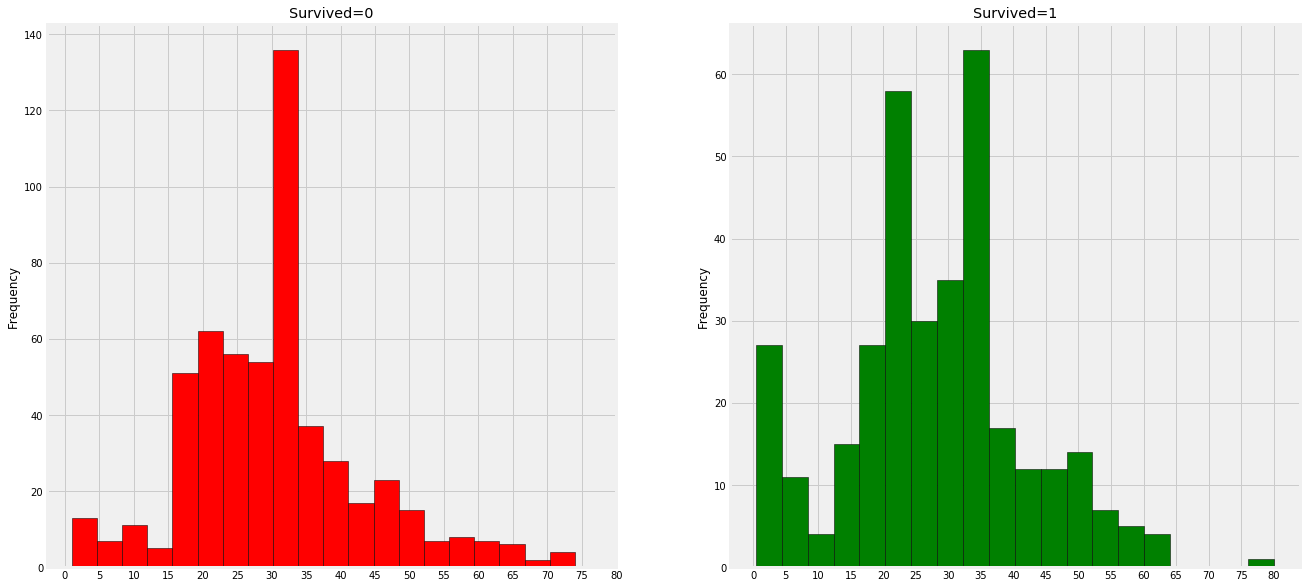

In [22]:
f, ax = plt.subplots(1, 2, figsize=(20, 10))
data[data['Survived']==0].Age.plot.hist(ax=ax[0], bins=20, edgecolor='black', color='red')
ax[0].set_title('Survived=0')
x1 = list(range(0, 85, 5))
ax[0].set_xticks(x1)
data[data['Survived']==1].Age.plot.hist(ax=ax[1], bins=20, edgecolor='black', color='green')
ax[1].set_title('Survived=1')
x2 = list(range(0, 85, 5))
ax[1].set_xticks(x2)
plt.show()

**Observations:**

1) The Toddlers(age<5) were saved in large numbers(The Women and Child First Policy).

2) The oldest Passenger was saved(80 years).

3) Maximum number of deaths were in age group of 30-40.

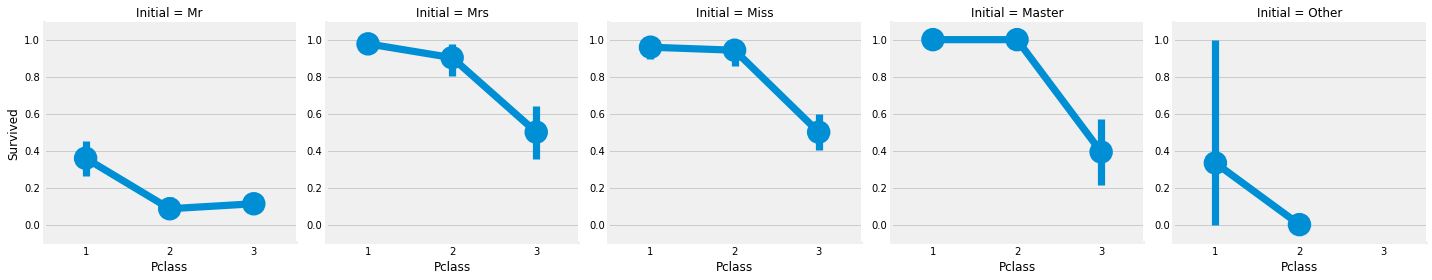

In [23]:
sns.factorplot('Pclass', 'Survived', col='Initial', data=data)
plt.show()

The Women and Child first policy thus holds true irrespective of the class.

### Name-Len

In [24]:
data['Name_Len'] = data['Name'].apply(lambda x: len(x))

In [25]:
print('Highest Name_Len was:',data['Name_Len'].max())
print('Lowest Name_Len was:',data['Name_Len'].min())
print('Average Name_Len was:',data['Name_Len'].mean())

Highest Name_Len was: 82
Lowest Name_Len was: 12
Average Name_Len was: 26.9652076319


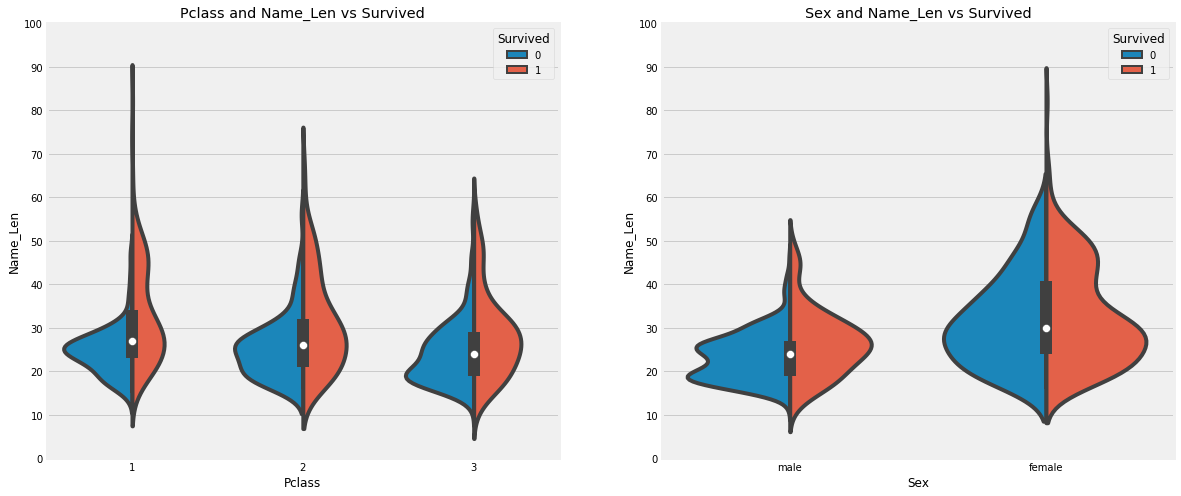

In [26]:
f,ax=plt.subplots(1,2,figsize=(18,8))
sns.violinplot("Pclass","Name_Len", hue="Survived", data=data,split=True,ax=ax[0])
ax[0].set_title('Pclass and Name_Len vs Survived')
ax[0].set_yticks(range(0,110,10))
sns.violinplot("Sex","Name_Len", hue="Survived", data=data,split=True,ax=ax[1])
ax[1].set_title('Sex and Name_Len vs Survived')
ax[1].set_yticks(range(0,110,10))
plt.show()

**Observations:**
1. the number of name_len increases with Pclass and the survival rate for passengers looks to be good irrespective of the Pclass.
2. For males, the survival chances increase with an increase in age.

### Dead_female_family & Survive_male_family

In [55]:
data['Surname'] = data['Name'].apply(lambda x:x.split(',')[0])

In [60]:
dead_female_surname = list(set(data[(data.Sex=='female') & (data.Age>=12)
                              & (data.Survived==0) & ((data.Parch>0) | (data.SibSp > 0))]['Surname'].values))

In [63]:
survive_male_surname = list(set(data[(data.Sex=='male') & (data.Age>=12)
                              & (data.Survived==1) & ((data.Parch>0) | (data.SibSp > 0))]['Surname'].values))

In [64]:
data['Dead_female_family'] = np.where(data['Surname'].isin(dead_female_surname),0,1)

In [65]:
data['Survive_male_family'] = np.where(data['Surname'].isin(survive_male_surname),0,1)

### Embarked --> Categorical Value

In [27]:
pd.crosstab([data.Embarked, data.Pclass], [data.Sex, data.Survived], margins=True).style.background_gradient(cmap='summer_r')

#### Chances for Survival by Port Of Embarkation

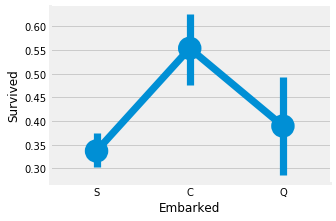

In [28]:
sns.factorplot('Embarked', 'Survived', data=data)
fig = plt.gcf() # gcf = get current figure
fig.set_size_inches(5, 3)
plt.show()

The chances for survival for Port C is highest around 0.55 while it is lowest for S.

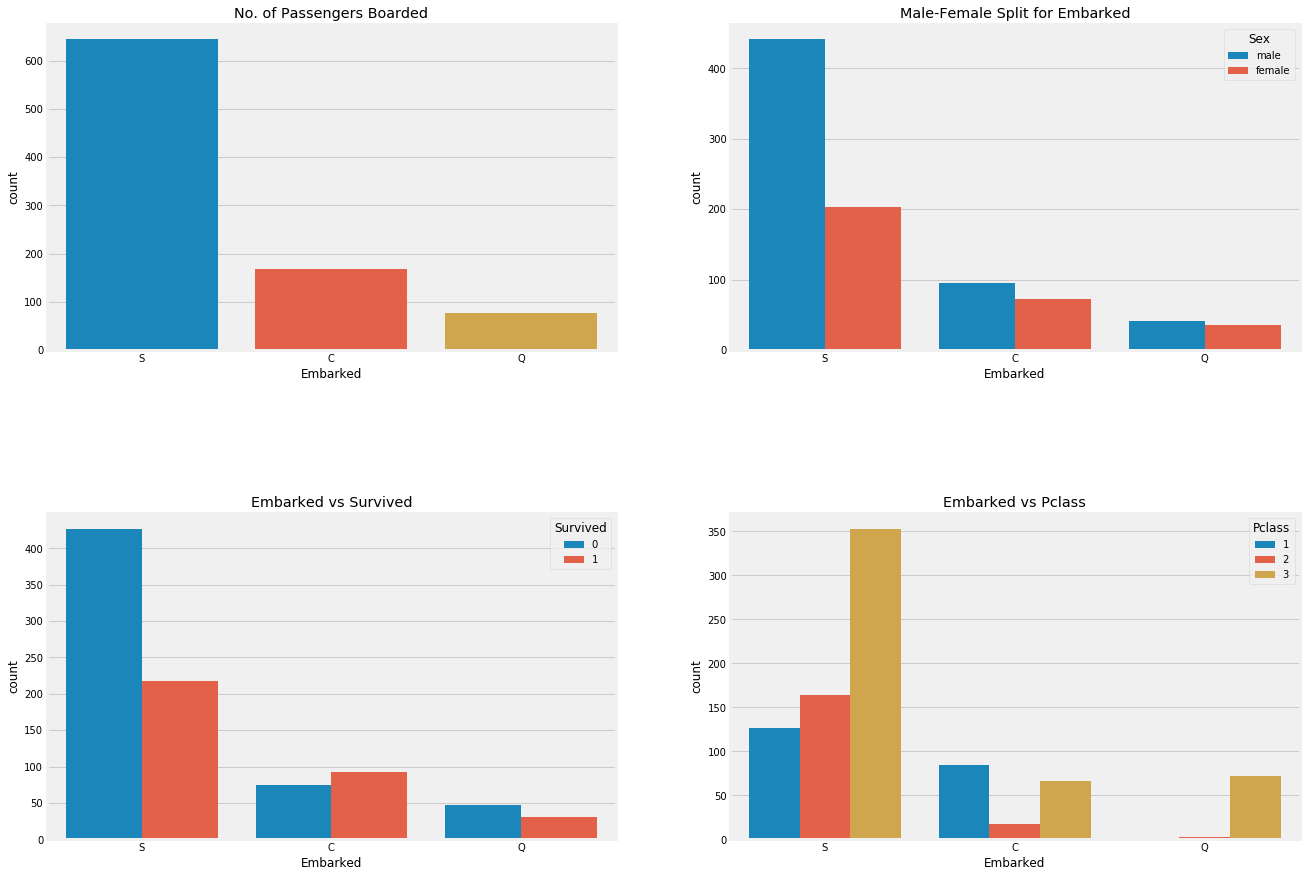

In [29]:
f,ax = plt.subplots(2, 2, figsize=(20, 15))
sns.countplot('Embarked', data=data, ax=ax[0, 0])
ax[0, 0].set_title('No. of Passengers Boarded')
sns.countplot('Embarked',hue='Sex', data=data, ax=ax[0, 1])
ax[0, 1].set_title('Male-Female Split for Embarked')
sns.countplot('Embarked',hue='Survived', data=data, ax=ax[1, 0])
ax[1, 0].set_title('Embarked vs Survived')
sns.countplot('Embarked',hue='Pclass', data=data, ax=ax[1, 1])
ax[1, 1].set_title('Embarked vs Pclass')
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

**Observations:**

1) Maximum passengers boarded from S. Majority of them being from Pclass3.

2) The Passengers from C look to be lucky as a good proportion of them survived. The reason for this maybe the rescue of lots Pclass1 Passengers.

3) The Embark S looks to the port from where majority of the rich people boarded. Still the chances for survival is low here. that is because many passengers from Pclass3 around **81%** didn't survive.

4) Port Q had almost 95% of the passengers were from Pclass3.

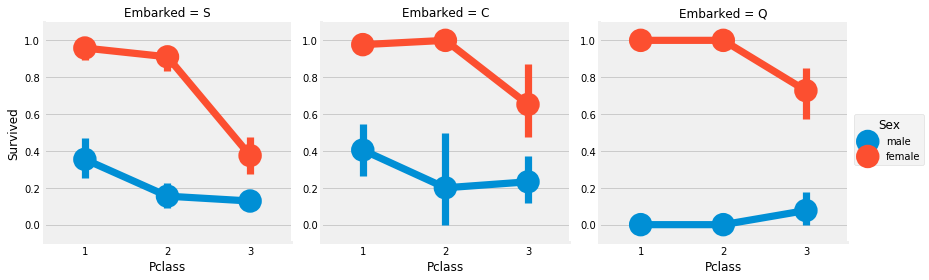

In [30]:
sns.factorplot('Pclass', 'Survived', hue='Sex', col='Embarked', data=data)
plt.show()

**Observations:**

1) The survival chances are almost 1 for women for Pclass1 and Pclass2 irrespective of the Pclass.

2) Port S looks to be very unlucky for Pclass3 Passengers as the survival rate for both men and women is very low.**(Money Matters)**

3) Port Q looks to be unlukest for Men, as almost all were from Pclass 3.

#### Filling Embarked NaN
As we saw that maximum passengers boarded from Port S, we replace NaN with S.

In [31]:
data['Embarked'].fillna('S', inplace=True)

In [32]:
data.Embarked.isnull().any() # Finally No NaN values

False

### SibSip --> Discrete Feature

This feature represents whether a person is alone or with his family members.

sibling = brother, sister, stepbrother, stepsister

Spouse = husband, wife

In [33]:
pd.crosstab([data.SibSp], data.Survived).style.background_gradient(cmap='summer_r')

Survived,0,1
SibSp,,
0,398,210
1,97,112
2,15,13
3,12,4
4,15,3
5,5,0
8,7,0


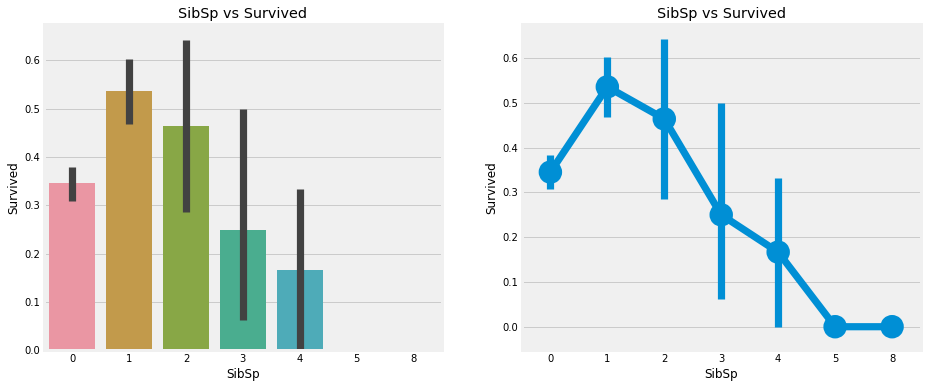

In [34]:
f,ax = plt.subplots(1, 2, figsize=(14, 6))
sns.barplot('SibSp', 'Survived', data=data, ax=ax[0])
ax[0].set_title('SibSp vs Survived')
sns.factorplot('SibSp', 'Survived', data=data, ax=ax[1])
ax[1].set_title('SibSp vs Survived')
plt.close(2)
plt.show()

In [35]:
pd.crosstab(data.SibSp, data.Pclass).style.background_gradient(cmap='summer_r')

Pclass,1,2,3
SibSp,,,
0,137,120,351
1,71,55,83
2,5,8,15
3,3,1,12
4,0,0,18
5,0,0,5
8,0,0,7


**Observations:**

The barplot adn factorplot shows that if a passenger is alone onboard with no siblings, he have 34.5% survival rate. The graph roughly decreases if the number of siblings increase. This makes sense. That is, if I have a family on board, I will try to save them instead of saving myself first. Surprisingly the survival for families with 5-7 members is **0%.** The reason may be Pclass?

The reason is **Plcass**. The crosstab shows that Person with SibSp>3 were all in Pclass3. It is imminent that all the large families in Pclass3(>3) died.

### Parch --> Discrete Feature

In [36]:
pd.crosstab(data.Parch, data.Pclass).style.background_gradient(cmap='summer_r')

Pclass,1,2,3
Parch,,,
0,163,134,381
1,31,32,55
2,21,16,43
3,0,2,3
4,1,0,3
5,0,0,5
6,0,0,1


The crosstab again shows that larger families were in Pclass3

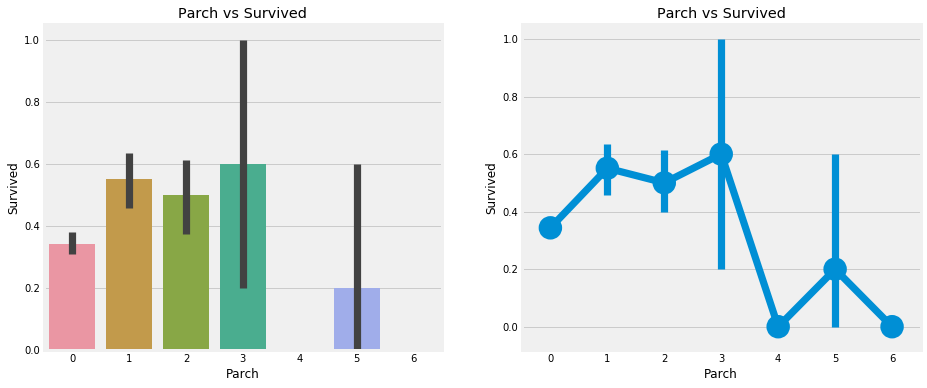

In [37]:
f,ax = plt.subplots(1, 2, figsize=(14, 6))
sns.barplot('Parch', 'Survived', data=data, ax=ax[0])
ax[0].set_title('Parch vs Survived')
sns.factorplot('Parch', 'Survived', data=data, ax=ax[1])
ax[1].set_title('Parch vs Survived')
plt.close(2)
plt.show()

**Observations:**

Here too the results are quite similar. Passengers with their parents onboard have greater chance of survival. It howerver reduces as the number goes up.

The chances of survival is good for somebody who has 1-3 parents or children on the ship. Beding alone also proves to be fatal and the chances for survival decreases when somebody has >4 parents on the ship.

### Fare --> Continous Feature

In [38]:
print('Highest Fare was:', data['Fare'].max())
print('Lowest Fare was:', data['Fare'].min())
print('Average Fare was:', data['Fare'].mean())

Highest Fare was: 512.3292
Lowest Fare was: 0.0
Average Fare was: 32.2042079686


The lowest fare is **0.0**. WoW! a free luxurious(dead) ride.

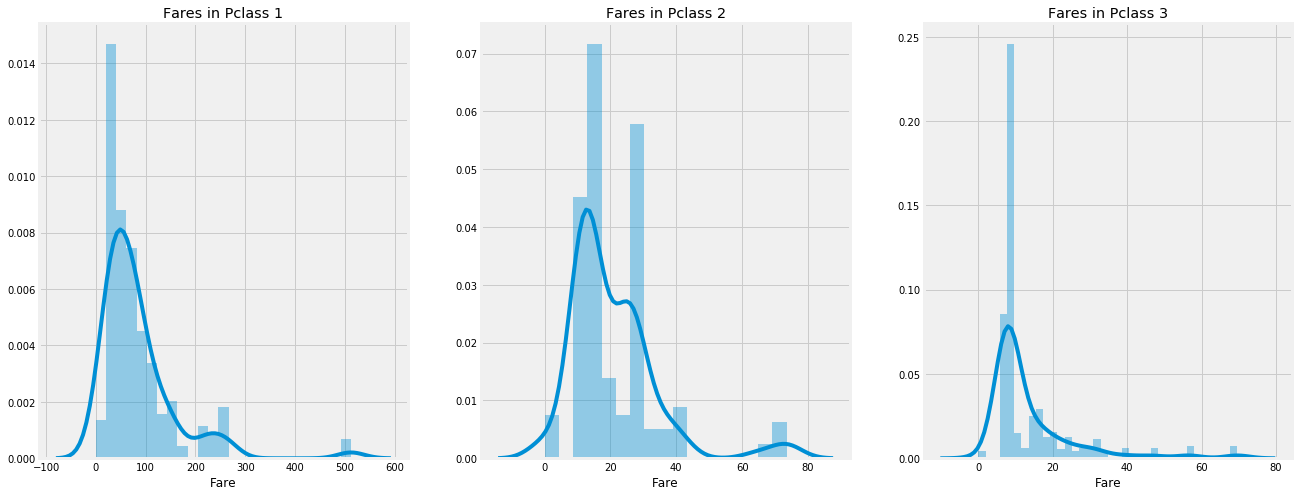

In [39]:
f,ax = plt.subplots(1, 3, figsize=(20, 8))
sns.distplot(data[data['Pclass']==1].Fare, ax=ax[0])
ax[0].set_title('Fares in Pclass 1')
sns.distplot(data[data['Pclass']==2].Fare, ax=ax[1])
ax[1].set_title('Fares in Pclass 2')
sns.distplot(data[data['Pclass']==3].Fare, ax=ax[2])
ax[2].set_title('Fares in Pclass 3')
plt.show()

There looks to be a large distribution in the fares of Passengers in Pclass1 and this ditribution goes on decreasing as the standards reduces. As this is also coninous, we can convert into discrete values by using binning.

### Observations in a Nutshell for all features:
**Sex:** The chance of survival for women is high as compared to men.

**Pclass:** There is a visible trend that beding a **1st class passenger** gives you better chances of survival. The survival rate for **Pclass3 is very low.** For **women**, the chances of suvival rom **Pclass1** is almost 1 and is high too for those from **Pclass2. Money Wins!!**

**Age:** Children less than 5-10 years do have a high chance of survival. Passengers between age group 15 to 35 died a lot.

**Embarked:** This is a very interesting feature. **The chances of survival at C looks to be better than even though the majority of Pclass1 passengers got up at S.** Passengers at Q were all from **Pclass3**.

**Parch+SibSp:** Having 1-2 siblings, spouse on board or 1-3 parents shows a greater chance of probility rather than being alone or having a large family travelling with you.

### Correlation Between The Features

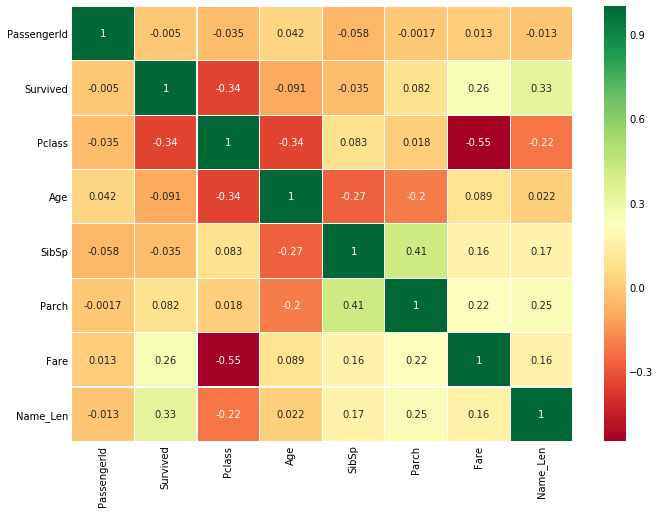

In [40]:
# data.corr() --> correlation matrix
sns.heatmap(data.corr(), annot=True, cmap='RdYlGn', linewidths=0.2) # annot = annotate, true write nums
fig = plt.gcf()
fig.set_size_inches(10, 8)
plt.show()

#### Interpreting The Heatmap
The first thing to note is that only numeric features are compared as it is obvious that cannot correlate between alphabets or strings. Before understanding the plot, let us see what exactly correlation is.

**Positive Correlation:** If an **increase in feature A leads to increase in feature B, then they are positively correlated.** A value **1 means perfect positive correlation.**

**Negative correlation:** If an **increase in feature A leads to decrease in feature B, then they are negative correlated.** A value **-1 means perfect negative correlation.**

Now lets say that two features are highly or perfectly correlated, so the increase in one leads to increase in the other. This means that both the features are containing highly similar information and there is very little or no variance in information. This is known as **MultiColinearity** as both of them contains almost the same information.

So do you think we should use both of them as **one of thme is redundant.** While making or training models, we should try to eliminate redundant features as it reduces training time and many such advantages.

Now from the above heatmap, we can see that the features are not much correlated. The highest correlation is between **SibSp and Parch i.e 0.41**. So we can carry on with all features.

# Part2: Feature Engineering and Data Cleaning
Now what is Feature Engineering?

Whenever we are given a dataset with features, it is not necessary that all the features will be important. There maybe be many redundant features which should be eliminated. Also we can get or add new features by observing or extracting information from other features.

An example would be getting the initals feature using the Name Feature. Lets see if we can get any new features and eliminate a few. Also we will tranform the existing relevant features to suitable form for Predictive Modeling.

### Age_band
**Problem With Age Feature:**

As I have mentioned earlier that **Age is a continous feature.** there is a problem with Continous Variables in Machine Learning Models.

**Eg:** If I say group or arrange Sports Person by **Sex**, We can easily segregate them by Male and Female.

Now if I say to group them by their **Age**, then how wold you do it? If there are 30 Persons, there may be 30 age values. Now this is problematic.

We need to convert these **continous values into categorical values** by either Binning or Normalisation. I will be using binning i.e group a range of ages into a single bin or assign them a single value.

Okay so the maximum age of a passenger was 80. So lets divide the range from 0-80 into 5 bins.So 80/5 = 16. So bins of size 16.

In [41]:
data['Age_band'] = 0
data.loc[data['Age'] <= 16, 'Age_band'] = 0
data.loc[(data['Age'] > 16)&(data['Age'] <= 32), 'Age_band'] = 1
data.loc[(data['Age'] > 32)&(data['Age'] <= 48), 'Age_band'] = 2
data.loc[(data['Age'] > 48)&(data['Age'] <= 64), 'Age_band'] = 3
data.loc[(data['Age'] > 64)&(data['Age'] <= 80), 'Age_band'] = 4
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Initial,Name_Len,Age_band
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,23,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,51,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss,22,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs,44,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr,24,2


In [42]:
# checking the number of passengers in each band
data['Age_band'].value_counts().to_frame().style.background_gradient(cmap='summer')

,Age_band
1,382
2,325
0,104
3,69
4,11


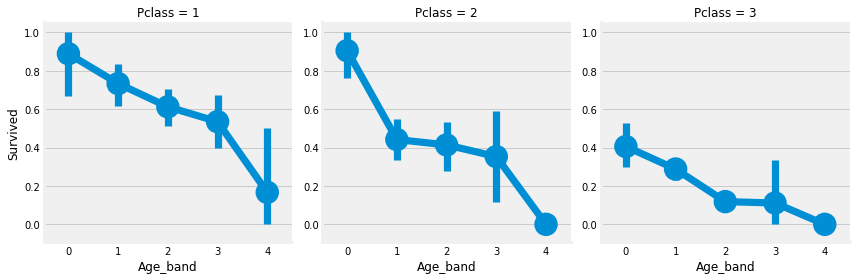

In [43]:
sns.factorplot('Age_band', 'Survived', data=data, col='Pclass')
plt.show()

True that.. the survival rate decreases as the age increase irrespective of the Pclass

### Family_Size and Alone
At this point, we can create a new feature called "Family_size" and "Alone" and analyse it. This feature is the summation of Parch and SibSp. It gives us a combined data so that we can check if survival rate have anything to do with family size of the passengers. Alone will denote whether a passenger is alone or not.

In [44]:
data['Family_Size'] = 0
data['Family_Size'] = data['Parch'] + data['SibSp']
data['Alone'] = 0
data.loc[data.Family_Size == 0, 'Alone'] = 1

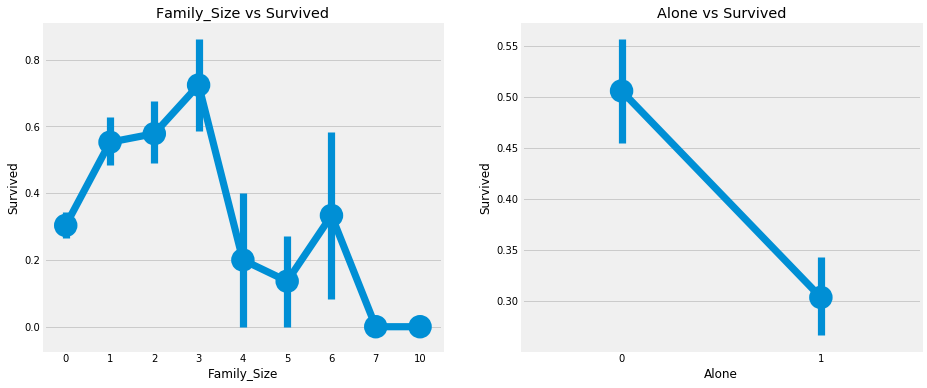

In [45]:
f,ax = plt.subplots(1, 2, figsize=(14, 6))
sns.factorplot('Family_Size', 'Survived', data=data, ax=ax[0])
ax[0].set_title('Family_Size vs Survived')
sns.factorplot('Alone', 'Survived', data=data, ax=ax[1])
ax[1].set_title('Alone vs Survived')
plt.close(2)
plt.close(3)
plt.show()

**Family_Size=0 means that the passenger is alone.** Clearly, if you are alone or family_size=0, then chances for survival is very low. For family_size >= 4, the chances decrease too. This also to be an important feature for the model. Lets examine this further.

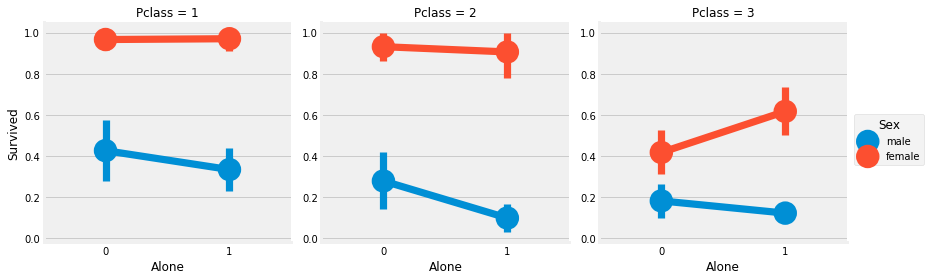

In [46]:
sns.factorplot('Alone', 'Survived', data=data, hue='Sex', col='Pclass')
plt.show()

It is visible that being is harmful irrespective of Sex of Pclass except for Pclass3 where the chances of females who are alone is high than those with family.

### Fare_Range
Since fare is also a continous feature, we need to convert it into ordinal value. For this use **pandas.qcut.**

So what **qcut** does is it splits or arranges the values according the number of bins we have passed. So if we pass for 5 bins, it will arrange the values equally spaced into 5 seperate bins or value ranges.

In [47]:
data['Fare_Range'] = pd.qcut(data['Fare'], 4)
data.groupby(['Fare_Range'])['Survived'].mean().to_frame().style.background_gradient(cmap='summer_r')

,Survived
Fare_Range,
"(-0.001, 7.91]",0.197309
"(7.91, 14.454]",0.303571
"(14.454, 31.0]",0.454955
"(31.0, 512.329]",0.581081


As discussed above, we can clearly see that as the **fare_range increases, the chances of survival increases.**

Now we cannot pass the Fare_Range values as it is. We should convert it into singleton values same as we did in **Age_band**.

In [48]:
data['Fare_cat'] = 0
data.loc[data['Fare'] <= 7.9, 'Fare_cat'] = 0
data.loc[(data['Fare'] > 7.9)&(data['Fare'] <= 14.454), 'Fare_cat'] = 1
data.loc[(data['Fare'] > 14.454)&(data['Fare'] <= 31), 'Fare_cat'] = 2
data.loc[(data['Fare'] > 31.0)&(data['Fare'] <= 513), 'Fare_cat'] = 3

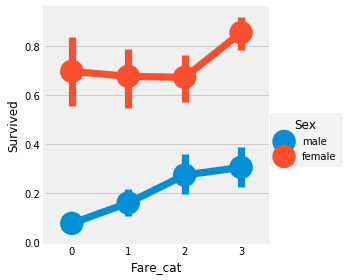

In [49]:
sns.factorplot('Fare_cat', 'Survived', data=data, hue='Sex')
plt.show()

Clearly, as the Fare_cat increases, the survival chances increases. This feature may become an important feature during modeling along with the Sex.

### Name_len Range

In [50]:
data['Name_Len_Range'] = pd.qcut(data['Name_Len'],5)
data.groupby(['Name_Len_Range'])['Survived'].mean().to_frame().style.background_gradient(cmap='summer_r')

,Survived
Name_Len_Range,
"(11.999, 19.0]",0.220588
"(19.0, 23.0]",0.301282
"(23.0, 27.0]",0.319797
"(27.0, 32.0]",0.442424
"(32.0, 82.0]",0.674556


In [53]:
data['Name_cat'] = 0
data.loc[(data['Name_Len'] > 11.999)&(data['Name_Len'] <= 19.0), 'Name_cat'] = 0
data.loc[(data['Name_Len'] > 19.0)&(data['Name_Len'] <= 23.0), 'Name_cat'] = 1
data.loc[(data['Name_Len'] > 23.0)&(data['Name_Len'] <= 27.0), 'Name_cat'] = 2
data.loc[(data['Name_Len'] > 27.0)&(data['Name_Len'] <= 32.0), 'Name_cat'] = 3
data.loc[(data['Name_Len'] > 32.0)&(data['Name_Len'] <= 82.0), 'Name_cat'] = 4

### Converting String Values into Numeric
Since we cannot pass strings to a machine learning model, we need to convert features like Sex, Embarked, etc into numeric values.

In [54]:
data['Sex'].replace(['male', 'female'], [0, 1], inplace=True)
data['Embarked'].replace(['S', 'C', 'Q'], [0, 1, 2], inplace=True)
data['Initial'].replace(['Mr', 'Mrs', 'Miss', 'Master', 'Other'], [0, 1, 2, 3, 4], inplace=True)

In [55]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Initial,Age_band,Family_Size,Alone,Fare_Range,Fare_cat
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,0,0,1,1,0,"(-0.001, 7.91]",0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,1,1,2,1,0,"(31.0, 512.329]",3
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,0,2,1,0,1,"(7.91, 14.454]",1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,0,1,2,1,0,"(31.0, 512.329]",3
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,0,0,2,0,1,"(7.91, 14.454]",1


### Dropping UnNeeded Features
**Name** --> We don't need name feature as it cannot be converted into any categorical value.

**Age** --> We have the Age_band feature, so no need of this.

**Ticket** --> It is any random string that cannot be categorised.

**Fare** --> We have the Fare_cat feature, so unneeded.

**Cabin** --> A lot of NaN values and also many passengers have multiple cabins. So this is a useless feature.

**Fare_Range** --> We have the fare_cat feature.

**PassengerId** --> Cannot be categorised.

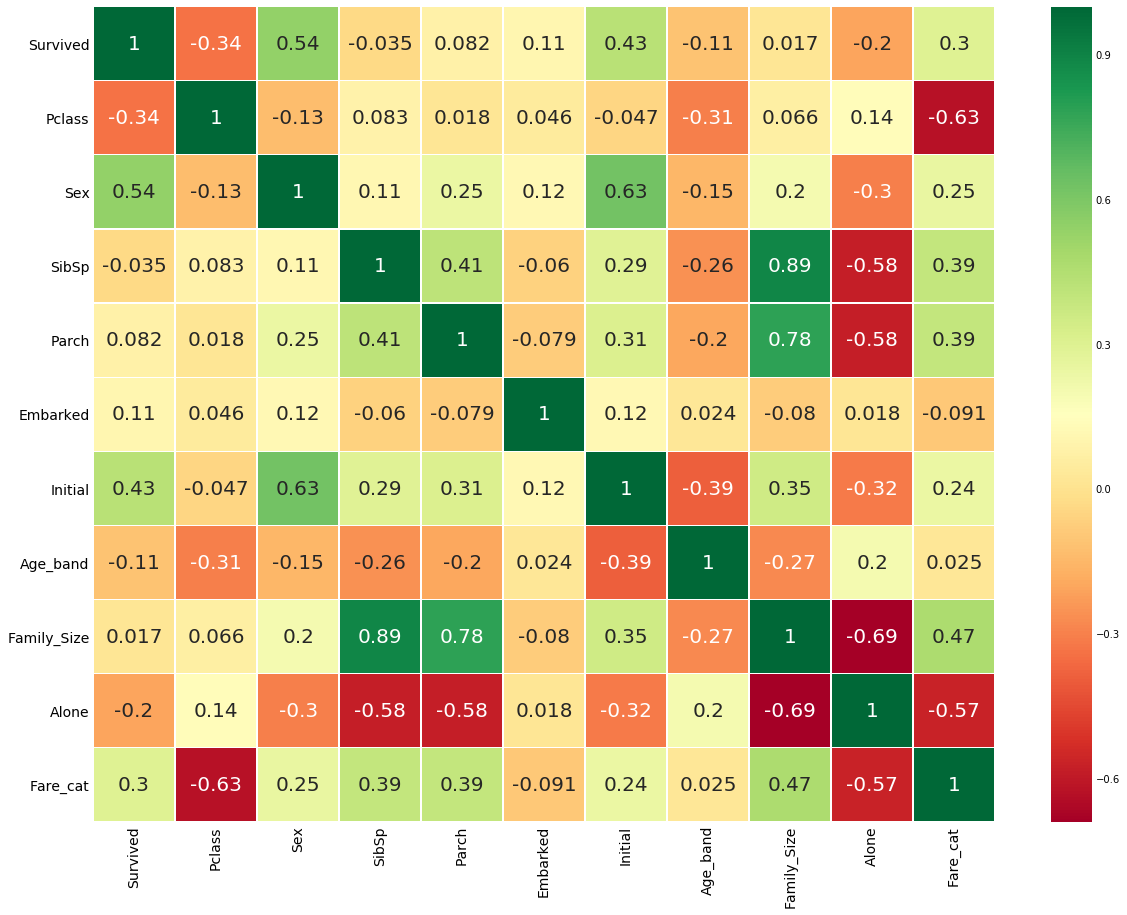

In [56]:
data.drop(['Name', 'Age', 'Ticket', 'Fare', 'Cabin', 'Fare_Range', 'PassengerId'], axis=1, inplace=True)
sns.heatmap(data.corr(), annot=True, cmap='RdYlGn', linewidths=0.2, annot_kws={'size':20})
fig = plt.gcf()
fig.set_size_inches(18, 15)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

Now the above correlation plot, we can see some positively related features. Some of them being **SibSp and Family_Size** and **Parch and Family_Size** and some negative ones like **Alone and Family_Size**.

### Processing test data

In [57]:
test_file = '/Users/hugo/Projects/Kaggle/Titanic-Kaggle/data/test.csv'
test_data = pd.read_csv(test_file)

In [58]:
test_data.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [59]:
# test_data initial
test_data['Initial']=0
for i in data:
    test_data['Initial'] = test_data.Name.str.extract('([A-Za-z]+)\.')

In [60]:
pd.crosstab(test_data.Initial,test_data.Sex).T.style.background_gradient(cmap='summer_r')

Initial,Col,Dona,Dr,Master,Miss,Mr,Mrs,Ms,Rev
Sex,,,,,,,,,
female,0,1,0,0,78,0,72,1,0
male,2,0,1,21,0,240,0,0,2


In [61]:
test_data.groupby('Initial')['Age'].mean()

Initial
Col       50.000000
Dona      39.000000
Dr        53.000000
Master     7.406471
Miss      21.774844
Mr        32.000000
Mrs       38.903226
Ms              NaN
Rev       35.500000
Name: Age, dtype: float64

In [62]:
test_data['Initial'].replace(['Col','Dona','Dr','Ms','Rev'],['Mr','Mrs','Mr','Mrs','Other'],inplace=True)

In [63]:
test_data.groupby('Initial')['Age'].mean()

Initial
Master     7.406471
Miss      21.774844
Mr        32.306452
Mrs       38.904762
Other     35.500000
Name: Age, dtype: float64

In [64]:
# Filling NaN ages
test_data.loc[(test_data.Age.isnull())&(test_data.Initial=='Master'),'Age']=7
test_data.loc[(test_data.Age.isnull())&(test_data.Initial=='Miss'),'Age']=22
test_data.loc[(test_data.Age.isnull())&(test_data.Initial=='Mr'),'Age']=32
test_data.loc[(test_data.Age.isnull())&(test_data.Initial=='Mrs'),'Age']=39
test_data.loc[(test_data.Age.isnull())&(test_data.Initial=='Other'),'Age']=35

In [65]:
print('Oldest Passenger was of:',test_data['Age'].max(),'Years')
print('Youngest Passenger was of:',test_data['Age'].min(),'Years')
print('Average Age on the ship:',test_data['Age'].mean(),'Years')

Oldest Passenger was of: 76.0 Years
Youngest Passenger was of: 0.17 Years
Average Age on the ship: 30.2380382775 Years


In [66]:
# Age_band
test_data['Age_band']=0
test_data.loc[test_data['Age']<=16,'Age_band']=0
test_data.loc[(test_data['Age']>16)&(test_data['Age']<=32),'Age_band']=1
test_data.loc[(test_data['Age']>32)&(test_data['Age']<=48),'Age_band']=2
test_data.loc[(test_data['Age']>48)&(test_data['Age']<=64),'Age_band']=3
test_data.loc[test_data['Age']>64,'Age_band']=4
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Initial,Age_band
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,Mr,2
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,Mrs,2
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,Mr,3
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,Mr,1
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,Mrs,1


In [67]:
test_data['Age_band'].value_counts().to_frame().style.background_gradient(cmap='summer')

,Age_band
1,249
2,92
0,38
3,37
4,2


In [68]:
# Family_Size and Alone
test_data['Family_Size']=0
test_data['Family_Size']=data['Parch']+data['SibSp']#family size
test_data['Alone']=0
test_data.loc[test_data.Family_Size==0,'Alone']=1#Alone

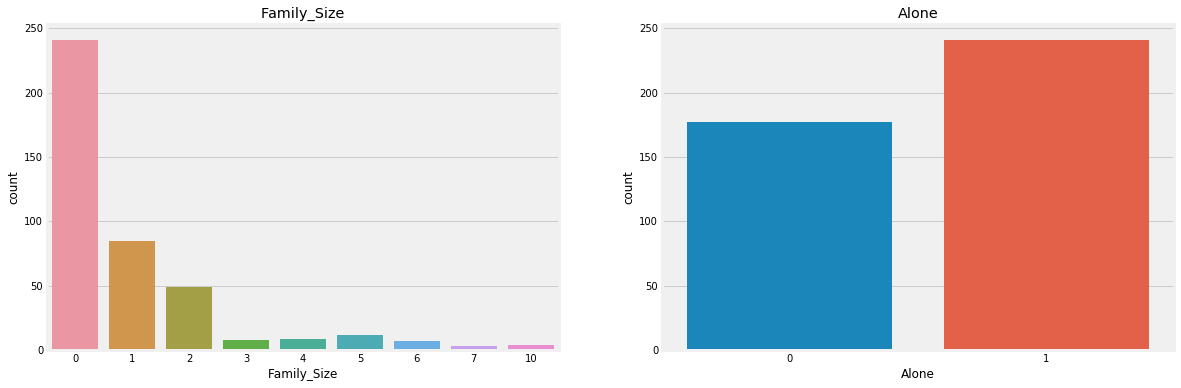

In [69]:
f,ax=plt.subplots(1,2,figsize=(18,6))
sns.countplot('Family_Size', data=test_data,ax=ax[0])
ax[0].set_title('Family_Size')
sns.countplot('Alone', data=test_data, ax=ax[1])
ax[1].set_title('Alone')
plt.close(2)
plt.close(3)
plt.show()

In [70]:
# Fare
print('Highest Fare was:',test_data['Fare'].max())
print('Lowest Fare was:',test_data['Fare'].min())
print('Average Fare was:',test_data['Fare'].mean())

Highest Fare was: 512.3292
Lowest Fare was: 0.0
Average Fare was: 35.6271884892


In [71]:
# Filling Fare NaN
test_data['Fare'].fillna(35.6,inplace=True)

In [72]:
test_data.Fare.isnull().any()

False

In [73]:
# Fare_Range
test_data['Fare_Range']=pd.qcut(test_data['Fare'],4)

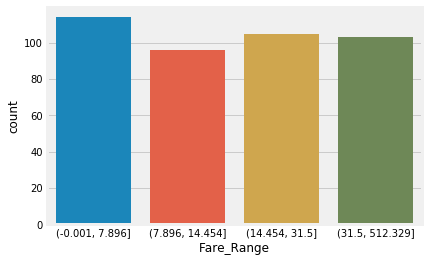

In [74]:
sns.countplot('Fare_Range', data=test_data)
plt.show()

In [75]:
test_data['Fare_cat']=0
test_data.loc[test_data['Fare']<=7.896,'Fare_cat']=0
test_data.loc[(test_data['Fare']>7.896)&(test_data['Fare']<=14.454),'Fare_cat']=1
test_data.loc[(test_data['Fare']>14.454)&(test_data['Fare']<=31.5),'Fare_cat']=2
test_data.loc[(test_data['Fare']>31.5)&(test_data['Fare']<=513),'Fare_cat']=3

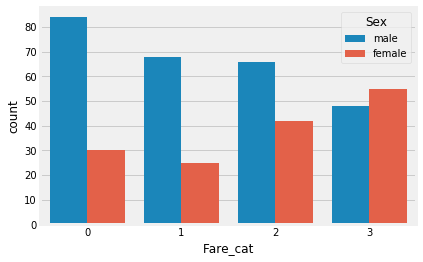

In [76]:
sns.countplot('Fare_cat', data=test_data, hue='Sex')
plt.show()

In [77]:
# Converting String values into Numeric
test_data['Sex'].replace(['male','female'],[0,1],inplace=True)
test_data['Embarked'].replace(['S','C','Q'],[0,1,2],inplace=True)
test_data['Initial'].replace(['Mr','Mrs','Miss','Master','Other'],[0,1,2,3,4],inplace=True)

In [78]:
# Get passngerId
test_Id = test_data['PassengerId']

In [79]:
test_data.drop(['Name','Age','Ticket','Fare','Cabin','Fare_Range','PassengerId'],axis=1,inplace=True)

# Part3: Predictive Modeling
We have gained some insights from the EDA part. But with that, we cannot accurately predict or tell whether a passenger will survive or die. So now we will predict the whether the Passenger will survive or not using some great Classification Algorithms. Following are the algorithms I will use to make the model:

1. Logistic Regression
2. Support Vector Machines(Linear and radial)
3. Random Forest
4. K-Nearest Neighbours
5. Naive Bayes
6. Decision Tree
7. Logistic Regression

In [80]:
# importing all the required ML packages
from sklearn.linear_model import LogisticRegression # logistic regression
from sklearn import svm # support vector machine
from sklearn.ensemble import RandomForestClassifier # Random Forest
from sklearn.neighbors import KNeighborsClassifier # KNN
from sklearn.naive_bayes import GaussianNB # Naive bayes
from sklearn.tree import DecisionTreeClassifier # Decision Tree
from sklearn.model_selection import train_test_split # training and testing data split
from sklearn import metrics # accuracy measure
from sklearn.metrics import confusion_matrix # for confusion matirx

In [81]:
# Get train and test set
train, test = train_test_split(data, test_size=0.3, random_state=0, stratify=data['Survived'])
train_X = train[train.columns[1:]]
train_Y = train[train.columns[:1]]
test_X = test[test.columns[1:]]
test_Y = test[test.columns[:1]]
X = data[data.columns[1:]]
Y = data['Survived']

### Radial Support Vecotr Machines(rbf-SVM)

In [82]:
model = svm.SVC(kernel='rbf', C=1, gamma=0.1)
model.fit(train_X, train_Y)
prediction1 = model.predict(test_X)
print('Accuracy for rbf SVM is', metrics.accuracy_score(prediction1, test_Y))

Accuracy for rbf SVM is 0.835820895522


In [124]:
# get the submission
model = svm.SVC(C=0.5, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.1, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)
model.fit(X, Y)
predictions = pd.Series(model.predict(test_data))

In [125]:
df = pd.DataFrame({"PassengerId": test_Id, "Survived": predictions})

In [126]:
df.to_csv("/Users/hugo/Projects/Kaggle/Titanic-Kaggle/output/submission-svm-rbf.csv", index=False)

### Linear Support Vector Machine(linear-SVM)

In [83]:
model = svm.SVC(kernel='linear', C=0.1, gamma=0.1)
model.fit(train_X, train_Y)
prediction2 = model.predict(test_X)
print('Accuracy for linear SVM is', metrics.accuracy_score(prediction2, test_Y))

Accuracy for linear SVM is 0.817164179104


### Logistic Regression

In [84]:
model = LogisticRegression()
model.fit(train_X, train_Y)
prediction3 = model.predict(test_X)
print('The accuracy of the Logistic Regression is', metrics.accuracy_score(prediction3, test_Y))

The accuracy of the Logistic Regression is 0.817164179104


### Decision Tree

In [85]:
model = DecisionTreeClassifier()
model.fit(train_X, train_Y)
prediction4 = model.predict(test_X)
print('The accuracy of the Decision Tree is', metrics.accuracy_score(prediction4, test_Y))

The accuracy of the Decision Tree is 0.805970149254


### K-Nearest Neighbours(KNN)

In [86]:
model = KNeighborsClassifier()
model.fit(train_X, train_Y)
prediction5 = model.predict(test_X)
print('The accuracy of the KNN is', metrics.accuracy_score(prediction5, test_Y))

The accuracy of the KNN is 0.832089552239


In [87]:
# get the submission
model = KNeighborsClassifier()
model.fit(X, Y)
predictions5 = pd.Series(model.predict(test_data))

In [88]:
df5 = pd.DataFrame({"PassengerId": test_Id, "Survived": predictions5})

In [89]:
df5.to_csv("/Users/hugo/Projects/Kaggle/Titanic-Kaggle/output/submission-KNN.csv", index=False)

Now the accuracy for the KNN model changes as we change the values for n_neighbours attribute. The default value is 5. Lets check the accuracies over various values of n_neighbours.

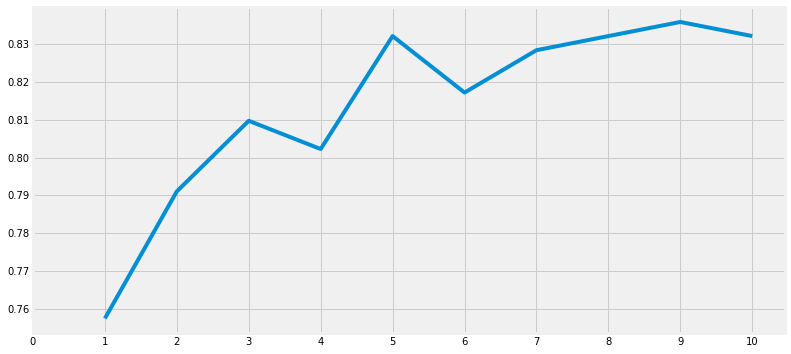

Accuracies for different values of n are: [ 0.75746269  0.79104478  0.80970149  0.80223881  0.83208955  0.81716418
  0.82835821  0.83208955  0.8358209   0.83208955] with the max value as:  0.835820895522


In [90]:
a_index = list(range(1, 11))
a = pd.Series()
x = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
for i in list(range(1, 11)):
    model = KNeighborsClassifier(n_neighbors=i)
    model.fit(train_X, train_Y)
    prediction = model.predict(test_X)
    a = a.append(pd.Series(metrics.accuracy_score(prediction, test_Y)))
plt.plot(a_index, a)
plt.xticks(x)
fig = plt.gcf()
fig.set_size_inches(12, 6)
plt.show()
print('Accuracies for different values of n are:', a.values, 'with the max value as: ', a.values.max())

### Gaussian Naive Bayes

In [91]:
model = GaussianNB()
model.fit(train_X, train_Y)
prediction6 = model.predict(test_X)
print('The accuracy of the NaiveBayes is', metrics.accuracy_score(prediction6, test_Y))

The accuracy of the NaiveBayes is 0.813432835821


### Random Forests

In [182]:
model = RandomForestClassifier(criterion='gini', 
                             n_estimators=700,
                             min_samples_split=16,
                             min_samples_leaf=1,
                             max_features='auto',
                             oob_score=True,
                             random_state=1,
                             n_jobs=-1)
model.fit(train_X, train_Y)
prediction7 = model.predict(test_X)
print('The accuracy of the Random Forests is', metrics.accuracy_score(prediction7, test_Y))

The accuracy of the Random Forests is 0.828358208955


In [157]:
# get the submission, best submission 0.80382
model = RandomForestClassifier(criterion='gini', 
                             n_estimators=700,
                             min_samples_split=16,
                             min_samples_leaf=1,
                             max_features='auto',
                             oob_score=True,
                             random_state=1,
                             n_jobs=-1)
model.fit(X, Y)
predictions7 = pd.Series(model.predict(test_data))
df7 = pd.DataFrame({"PassengerId": test_Id, "Survived": predictions7})
df7.to_csv("/Users/hugo/Projects/Kaggle/Titanic-Kaggle/output/submission-Random-Forests.csv", index=False)

The accuracy of a model is not the only facotr that determines the robustness of the classifier. Lets say that a classifier is trained over a training data and tested over the test data and it scores an accuracy of 90%.

Now this seems to be very good accuracy for a classifier, but can we confirm that it will be 90% for all the new test sets that come over?? The answer is **no**, because we cant determine which all instances will the classifier will use to train itself. As the training and testing data changes, the accuracy will also chage. It may increase or decrease. This is known as **model variance.**

To overcome this and get a generalized model, we use **Cross Validation**.

## Cross Validation
Many a times, the data is imbalanced, i.e there may be a high number of class1 instances but less number of other class instances. Thus we should train and test our algorithm on each and every instance of the dataset. Then we can take an average of all the noted accuracies over the datset.

1. The K-Fold Cross Validation works by first dividing the dataset into k-subsets.
2. Lets say we divide the dataset into (k=5) parts. We reserve 1 part for testing and train the algorithm over the 4 parts.
3. We continue the process by changing the testing part in each iteration and training the algorithm over the other parts. The accuracies and errors are then averaged to get a average accuracy of the algorithm.

This is called K-Fold Cross Validation.

4. An algorithm may underfit over a dataset for some training data and sometimes also overfit the data for other training set. Thus with cross-validation, we can achieve a generalised model.

In [94]:
from sklearn.model_selection import KFold # for K-fold cross validation
from sklearn.model_selection import cross_val_score # score evaluation
from sklearn.model_selection import cross_val_predict # prediction
kfold = KFold(n_splits=10, random_state=22) # k=10, split the data into 10 equal parts
xyz = []
accuracy = []
std = []
classifiers = ['Linear Svm', 'Radial Svm', 'Logistic Regression', 'KNN', 'Decision Tree', 'Naive Bayes', 'Random Forest']
models = [svm.SVC(kernel='linear'), svm.SVC(kernel='rbf'), LogisticRegression(), KNeighborsClassifier(n_neighbors=9), DecisionTreeClassifier(), GaussianNB(), RandomForestClassifier(n_estimators=100)]
for i in models:
    model = i
    cv_result = cross_val_score(model, X, Y, cv=kfold, scoring='accuracy')
    cv_result = cv_result
    xyz.append(cv_result.mean())
    std.append(cv_result.std())
    accuracy.append(cv_result)
new_models_dataframe2 = pd.DataFrame({'CV Mean':xyz, "Std":std}, index=classifiers)

In [95]:
new_models_dataframe2

,CV Mean,Std
Linear Svm,0.793471,0.047797
Radial Svm,0.828290,0.034427
Logistic Regression,0.805843,0.021861
KNN,0.813783,0.041210
Decision Tree,0.813708,0.026080
Naive Bayes,0.801386,0.028999
Random Forest,0.815968,0.036813


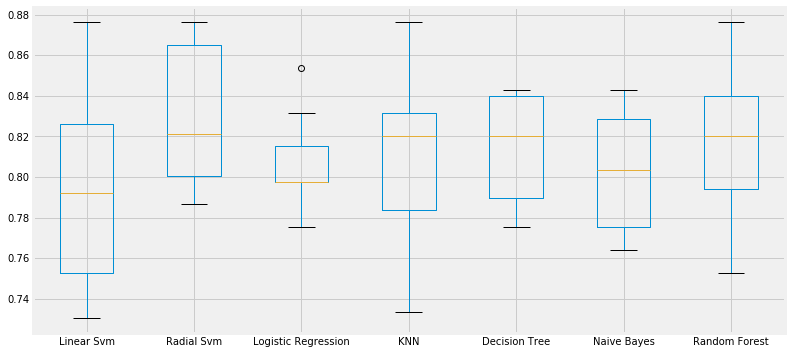

In [96]:
plt.subplots(figsize=(12, 6))
box = pd.DataFrame(accuracy, index=[classifiers])
box.T.boxplot()
plt.show()

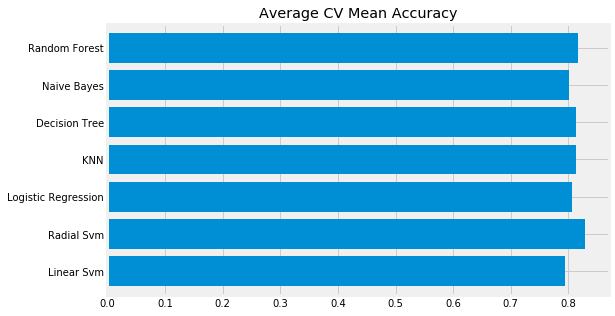

In [97]:
new_models_dataframe2['CV Mean'].plot.barh(width=0.8)
plt.title('Average CV Mean Accuracy')
fig = plt.gcf()
fig.set_size_inches(8, 5)
plt.show()

The classification accuracy can be sometimes misleading due to imbalance. We can get a summearized result with the help of confusion matrix, which shows where did the model go wrong. or which class did the model predict wrong.

## Confusion Matrix
It gives the number of correct and incorrect classifications made by the classifier.

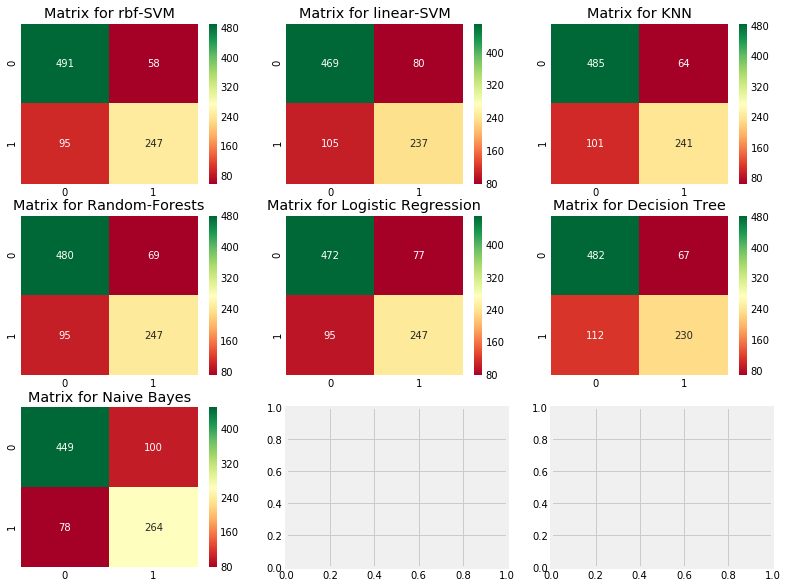

In [98]:
f,ax = plt.subplots(3, 3, figsize=(12, 10))

y_pred = cross_val_predict(svm.SVC(kernel='rbf'), X, Y, cv=10)
sns.heatmap(confusion_matrix(Y, y_pred), cmap='RdYlGn', ax=ax[0, 0], annot=True, fmt='2.0f')
ax[0, 0].set_title('Matrix for rbf-SVM')

y_pred = cross_val_predict(svm.SVC(kernel='linear'), X, Y, cv=10)
sns.heatmap(confusion_matrix(Y, y_pred), cmap='RdYlGn', ax=ax[0, 1], annot=True, fmt='2.0f')
ax[0, 1].set_title('Matrix for linear-SVM')

y_pred = cross_val_predict(KNeighborsClassifier(n_neighbors=9), X, Y, cv=10)
sns.heatmap(confusion_matrix(Y, y_pred), cmap='RdYlGn', ax=ax[0, 2], annot=True, fmt='2.0f')
ax[0, 2].set_title('Matrix for KNN')

y_pred = cross_val_predict(RandomForestClassifier(n_estimators=100), X, Y, cv=10)
sns.heatmap(confusion_matrix(Y, y_pred), cmap='RdYlGn', ax=ax[1, 0], annot=True, fmt='2.0f')
ax[1, 0].set_title('Matrix for Random-Forests')

y_pred = cross_val_predict(LogisticRegression(), X, Y, cv=10)
sns.heatmap(confusion_matrix(Y, y_pred), cmap='RdYlGn', ax=ax[1, 1], annot=True, fmt='2.0f')
ax[1, 1].set_title('Matrix for Logistic Regression')

y_pred = cross_val_predict(DecisionTreeClassifier(), X, Y, cv=10)
sns.heatmap(confusion_matrix(Y, y_pred), cmap='RdYlGn', ax=ax[1, 2], annot=True, fmt='2.0f')
ax[1, 2].set_title('Matrix for Decision Tree')

y_pred = cross_val_predict(GaussianNB(), X, Y, cv=10)
sns.heatmap(confusion_matrix(Y, y_pred), cmap='RdYlGn', ax=ax[2, 0], annot=True, fmt='2.0f')
ax[2, 0].set_title('Matrix for Naive Bayes')
plt.subplots_adjust(hspace=0.2, wspace=0.2)
plt.show()

### Interpreting Confusion Matrix
The left diagonal shows the number of correct predictions made for each class while the right diagonal shows the number of wrong predictions made. Lets consider the first plot for rbf-SVM.
1. The no. of correct predictions are **491(for dead) + 247(for survived)** with the mean CV accuracy being **(491 + 247)/891 = 82.8%** which we did get earlier.
2. **Errors**--> Wrongly Classified 58 dead people as survived and 95 survived as dead. Thus it has made more mistakes by predicting dead as survived.

By looking at all the matrics, we can say that rbf-SVM has a higher chance in correctly predicting dead passengers but NaiveBayes has a higher chance in correctly predicting passengers who survived.

### Hyper-Parameters Tuning
The machine learning models are like a Black-Box. There are some default parameter values for this Black-Box, which we can tune or change to get a better model. Like the C and gamma in the SVM model and similarly different parameters for different classifiers, are called the hyper-parameters, which we can tune to chage the learning rate of the algorithm and get a better model. This is known as Hyper-Parameter Tuning.

We will tune the hyper-parameters for the 2 best classifiers i.e the SVM and RandomForests.

#### SVM

In [99]:
from sklearn.model_selection import GridSearchCV
C = [0.05, 0.1, 0.2, 0.3, 0.25, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]
gamma = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
kernel = ['rbf', 'linear']
hyper = {'kernel': kernel, 'C': C, 'gamma': gamma}
gd = GridSearchCV(estimator=svm.SVC(), param_grid=hyper, verbose=True)
gd.fit(X, Y)
print(gd.best_score_)
print(gd.best_estimator_)

Fitting 3 folds for each of 240 candidates, totalling 720 fits
0.828282828283
SVC(C=0.5, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.1, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)


[Parallel(n_jobs=1)]: Done 720 out of 720 | elapsed:   11.0s finished


#### Random Forests

In [100]:
n_estimators = range(100, 1000, 100)
hyper = {'n_estimators': n_estimators}
gd = GridSearchCV(estimator=RandomForestClassifier(random_state=0), param_grid=hyper, verbose=True)
gd.fit(X, Y)
print(gd.best_score_)
print(gd.best_estimator_)

Fitting 3 folds for each of 9 candidates, totalling 27 fits


[Parallel(n_jobs=1)]: Done  27 out of  27 | elapsed:   22.0s finished


0.817059483726
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=900, n_jobs=1,
            oob_score=False, random_state=0, verbose=0, warm_start=False)


The best score for Rbf-Svm is **82.82% with C=0.5 and gamma=0.1.** For RandomForest score is abt **81,7% with n_estimators=900**

## Ensembling
Ensembling is a good way to increase the accuracy or performance of a model. In simple words, it is the combination of various simple models to create a single powerful model.

Lets say we want to buy a phone and ask many people about it based on various parameters. So then we can make a strong judgement about a single product after analysing all different parameters. This is **Ensembling.** which imporves the stability of the model. Ensembling can be done in ways like:
1. Voting Classifier
2. Bagging
3. Boosting

### Voting Classifier
It is the simplest way of combining predictions from many different simple machine learning models. It gives an average prediction result based on the prediction of all the submodels. The submodels or the basemodels are all of different types.

In [101]:
from sklearn.ensemble import VotingClassifier
ensemble_lin_rbf = VotingClassifier(estimators=[('KNN', KNeighborsClassifier(n_neighbors=10)),
                                                ('RBF', svm.SVC(probability=True, kernel='rbf', C=0.5, gamma=0.1)),
                                                ('RFor', RandomForestClassifier(n_estimators=900, random_state=0)),
                                                ('LR', LogisticRegression(C=0.05)),
                                                ('DT', DecisionTreeClassifier(random_state=0)),
                                                ('NB', GaussianNB()),
                                                ('svm', svm.SVC(kernel='linear', probability=True))
                                                 ],
                                    voting='soft').fit(train_X, train_Y)
print('The accuracy for ensembled model is:', ensemble_lin_rbf.score(test_X, test_Y))
cross = cross_val_score(ensemble_lin_rbf, X, Y, cv=10, scoring='accuracy')
print('The cross validated score is', cross.mean())

The accuracy for ensembled model is: 0.824626865672
The cross validated score is 0.823766031097


### Bagging
Bagging is a general ensemble method. It works by applying similar classifiers on small partitions of the dataset and then taking the average of all the predictions. Due to the averaging, there is reduction in variance. Unlike Voting Classifier, Bagging makes use of similar classifiers.

#### Bagged KNN
Bagging works best with models with high variance. An examle for this can be Decision Tree or Random Forests. We can use KNN with small value of **n_neighbours**, as small value of n_neighbours.

In [102]:
from sklearn.ensemble import BaggingClassifier
model = BaggingClassifier(base_estimator=KNeighborsClassifier(n_neighbors=3), random_state=0, n_estimators=700)
model.fit(train_X, train_Y)
prediction = model.predict(test_X)
print('The accuracy for bagged KNN is:', metrics.accuracy_score(prediction, test_Y))
result = cross_val_score(model, X, Y, cv=10, scoring='accuracy')
print('The cross validated score for bagged KNN is:', result.mean()) 

The accuracy for bagged KNN is: 0.835820895522
The cross validated score for bagged KNN is: 0.814889342867


#### bagged RandomForest

In [170]:
model = BaggingClassifier(base_estimator=RandomForestClassifier(min_samples_split=16, max_features='auto', criterion='gini', min_weight_fraction_leaf=0.1) , random_state=0, n_estimators=700)
model.fit(train_X, train_Y)
prediction = model.predict(test_X)
print('The accuracy for bagged RF is:', metrics.accuracy_score(prediction, test_Y))
#result = cross_val_score(model, X, Y, cv=10, scoring='accuracy')
#print('The cross validated score for bagged RF is:', result.mean()) 

The accuracy for bagged RF is: 0.798507462687


#### Bagged Decision Tree

In [103]:
model = BaggingClassifier(base_estimator=DecisionTreeClassifier(), random_state=0, n_estimators=100)
model.fit(train_X, train_Y)
prediction = model.predict(test_X)
print('The accuracy for bagged Decision Tree is:', metrics.accuracy_score(prediction, test_Y))
result = cross_val_score(model, X, Y, cv=10, scoring='accuracy')
print('The cross validated score for bagged Decision Tree is: ', result.mean())

The accuracy for bagged Decision Tree is: 0.824626865672
The cross validated score for bagged Decision Tree is:  0.820482635342


#### Bagged SVM-linear

In [135]:
model = BaggingClassifier(base_estimator=svm.SVC(kernel='linear',C=0.1,gamma=0.1), random_state=0, n_estimators=100)
model.fit(train_X, train_Y)
prediction = model.predict(test_X)
print('The accuracy for bagged SVM-linear is:', metrics.accuracy_score(prediction, test_Y))
result = cross_val_score(model, X, Y, cv=10, scoring='accuracy')
print('The cross validated score for bagged SVM-Linear is: ', result.mean())

The accuracy for bagged SVM-linear is: 0.817164179104
The cross validated score for bagged SVM-Linear is:  0.803578197707


In [136]:
model = BaggingClassifier(base_estimator=svm.SVC(kernel='linear',C=0.1,gamma=0.1), n_estimators=20, max_samples=0.8, max_features=1.0, bootstrap=True, bootstrap_features=False, n_jobs=-1)
model.fit(X, Y)
prediction = model.predict(test_data)
df = pd.DataFrame({"PassengerId": test_Id, "Survived": prediction})
df.to_csv("/Users/hugo/Projects/Kaggle/Titanic-Kaggle/output/submission-bagged-linear.csv", index=False)

### Boosting
Boosting is an ensembling technique which uses sequential learning of classifiers. It is a step by step enhancement of a weak model. Boosting works as follows:

A model is first trained on the complete dataset. Now the model will get some instances right while some wrong. Now in the next iteration, the learner will focus more on the wrongly predicted instances or give more wight to it. Thus it will try to predict the wrong instance correctly. Now this iterative process continous, and new classifers are added to the model until the limit is reached on the accuracy.

#### AdaBoost(Adaptive Boosting)
The weak learner or estimator in this case is a Decision Tree. But we can chage the default base_estimator to any algorithm of our choice.

In [104]:
from sklearn.ensemble import AdaBoostClassifier
ada = AdaBoostClassifier(n_estimators=200, random_state=0, learning_rate=0.1)
result = cross_val_score(ada, X, Y, cv=10, scoring='accuracy')
print('The cross validated score for AdaBoost is:', result.mean())

The cross validated score for AdaBoost is: 0.824952616048


#### Stochastic Gradient Boosting
Here too the weak learner is a Decision Tree.

In [105]:
from sklearn.ensemble import GradientBoostingClassifier
grad = GradientBoostingClassifier(n_estimators=500, random_state=0, learning_rate=0.1)
result = cross_val_score(grad, X, Y, cv=10, scoring='accuracy')
print('The cross validated score for Gradient Boosting is:', result.mean())

The cross validated score for Gradient Boosting is: 0.818286233118


#### XGBoost

In [106]:
import xgboost as xg
xgboost = xg.XGBClassifier(n_estimators=900, learning_rate=0.1)
result = cross_val_score(xgboost, X, Y, cv=10, scoring='accuracy')
print('The cross validated score for XGBoost is:', result.mean())

The cross validated score for XGBoost is: 0.810471002156


We got the highest accuracy for AdaBoost. We will try to increase it with HYper-Parameter Tuning

#### Hyper-Parameter Tuning for AdaBoost

In [107]:
n_estimators = list(range(100, 1100, 100))
learn_rate = [0.05, 0.1, 0.2, 0.3, 0.25, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]
hyper = {'n_estimators': n_estimators, 'learning_rate': learn_rate}
gd = GridSearchCV(estimator=AdaBoostClassifier(), param_grid=hyper, verbose=True)
gd.fit(X, Y)
print(gd.best_score_)
print(gd.best_estimator_)

Fitting 3 folds for each of 120 candidates, totalling 360 fits


[Parallel(n_jobs=1)]: Done 360 out of 360 | elapsed:  5.4min finished


0.83164983165
AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
          learning_rate=0.05, n_estimators=200, random_state=None)


The maximum accuracy we can get with AdaBoost is **83.16% with n_estimators=200 and learning_rate=0.05**

### Confusion Matrix for the Best Model

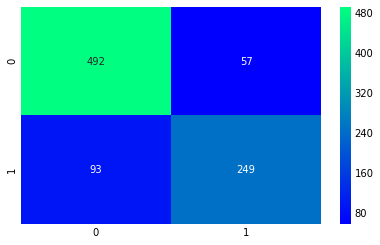

In [119]:
ada = AdaBoostClassifier(n_estimators=200, random_state=0, learning_rate=0.05)
result = cross_val_predict(ada, X, Y, cv=10)
sns.heatmap(confusion_matrix(Y, result), cmap='winter', annot=True, fmt='2.0f')
plt.show()

## Feature Importance

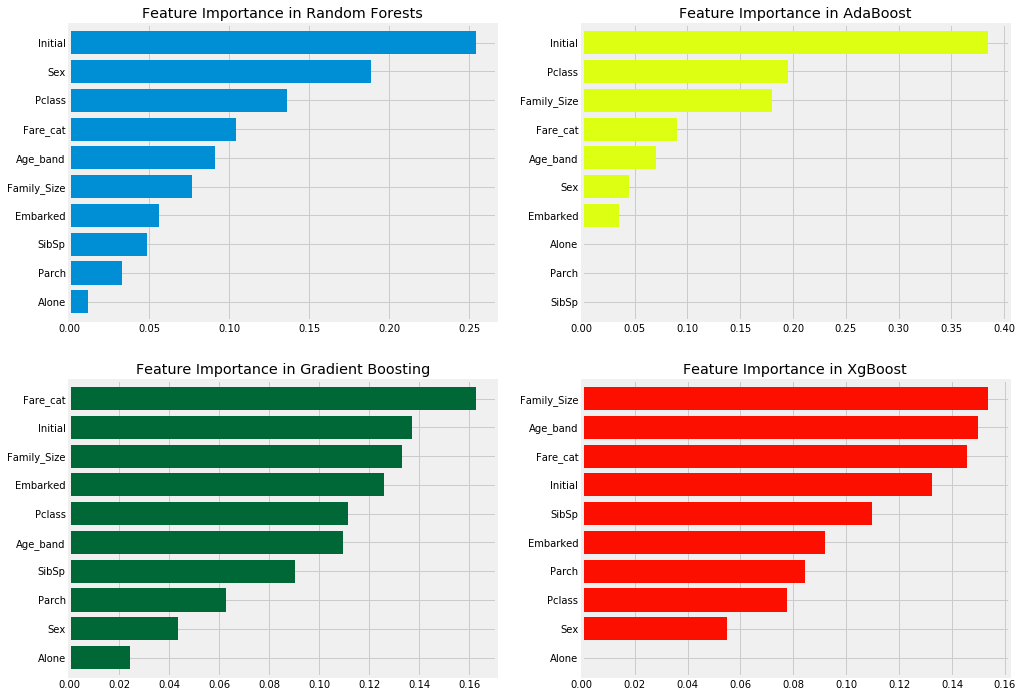

In [123]:
f, ax = plt.subplots(2, 2, figsize=(15, 12))
model = RandomForestClassifier(n_estimators=500, random_state=0)
model.fit(X, Y)
pd.Series(model.feature_importances_,X.columns).sort_values(ascending=True).plot.barh(width=0.8,ax=ax[0,0])
ax[0, 0].set_title('Feature Importance in Random Forests')
model=AdaBoostClassifier(n_estimators=200,learning_rate=0.05,random_state=0)
model.fit(X,Y)
pd.Series(model.feature_importances_,X.columns).sort_values(ascending=True).plot.barh(width=0.8,ax=ax[0,1],color='#ddff11')
ax[0,1].set_title('Feature Importance in AdaBoost')
model=GradientBoostingClassifier(n_estimators=500,learning_rate=0.1,random_state=0)
model.fit(X,Y)
pd.Series(model.feature_importances_,X.columns).sort_values(ascending=True).plot.barh(width=0.8,ax=ax[1,0],cmap='RdYlGn_r')
ax[1,0].set_title('Feature Importance in Gradient Boosting')
model=xg.XGBClassifier(n_estimators=900,learning_rate=0.1)
model.fit(X,Y)
pd.Series(model.feature_importances_,X.columns).sort_values(ascending=True).plot.barh(width=0.8,ax=ax[1,1],color='#FD0F00')
ax[1,1].set_title('Feature Importance in XgBoost')
plt.show()

We can see the important features for various classifiers like RandomForests, AdaBoost, etc.

**Observations:**
1. Some of the common important features are Initial, Fare_cat, Pclass, Family_Size.
2. The Sex feature doesn't seem to give any importance, which is shocking as we had seen earlier that Sex combined with Pclass was giving a very good differentiating factor. Sex looks to be important in RandomForests. However, we can see the feature Initial, which is at the top in many classifiers. We had already seen the positive correlation between Sex and Initial, so they both refer to the gender.
3. Similarly the Pclass and Fare_cat fefer to the status of the passengers and Family_Size with Alone, Parch and SibSp.